In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('proportion_of_population_with_primary_reliance_on_clean_fuels_and_technology.csv', index_col=0, encoding='latin-1')


Identificación de tipos de datos

In [4]:
df.dtypes

Target               float64
Indicator             object
SeriesCode            object
SeriesDescription     object
GeoAreaCode            int64
GeoAreaName           object
TimePeriod             int64
Value                 object
Time_Detail            int64
TimeCoverage         float64
UpperBound           float64
LowerBound           float64
BasePeriod           float64
Source                object
GeoInfoUrl           float64
FootNote              object
Nature                object
Reporting Type        object
Units                 object
Unnamed: 20          float64
Unnamed: 21          float64
Unnamed: 22          float64
Unnamed: 23          float64
Unnamed: 24          float64
Unnamed: 25          float64
Unnamed: 26          float64
Unnamed: 27          float64
Unnamed: 28          float64
Unnamed: 29          float64
Unnamed: 30          float64
Unnamed: 31          float64
Unnamed: 32          float64
Unnamed: 33          float64
Unnamed: 34          float64
Unnamed: 35   

En una primera mirada rápida, habría que borrar todsa las columnas Unnamed ya que parecen no tener datos

Tamaño del dataset

In [5]:
df.shape

(4536, 39)

Ver estadísticas del dataset

In [6]:
df.describe()

,Target,GeoAreaCode,TimePeriod,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,GeoInfoUrl,Unnamed: 20,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
count,4.536000e+03,4536.000000,4536.000000,4536.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.100000e+00,416.652778,2010.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.882763e-16,259.498373,6.055968,6.055968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.100000e+00,1.000000,2000.000000,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.100000e+00,187.000000,2005.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.100000e+00,420.500000,2010.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.100000e+00,642.250000,2015.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.100000e+00,894.000000,2020.000000,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Según esta descripción también habría que borrar las columnas TimeCoverage, UpperBound, LowerBound, BasePeriod, GeoInfoUrl y FootNote


Analizar datos columna por columna

In [7]:
df['Target'].value_counts()

7.1    4536
Name: Target, dtype: int64

In [8]:
df['Indicator'].value_counts()

7.1.2    4536
Name: Indicator, dtype: int64

In [9]:
df['SeriesCode'].value_counts()

EG_EGY_CLEAN    4536
Name: SeriesCode, dtype: int64

In [10]:
df['SeriesDescription'].value_counts()

Proportion of population with primary reliance on clean fuels and technology (%)    4536
Name: SeriesDescription, dtype: int64

In [11]:
df['Reporting Type'].value_counts()

G    4536
Name: Reporting Type, dtype: int64

In [12]:
df['Units'].value_counts()

PERCENT    4536
Name: Units, dtype: int64

Estas cinco columnas ('Reporting Type', 'Units', 'SeriesCode', 'SeriesDescription', 'Target' e 'Indicator') tienen el mismo tipo de dato en todas las filas, por lo que se podría evaluar borrarlas.

Ojo, en este caso 'Nature' tiene distinto tipos de datos, por lo que si se van a unir distintos datasets, habría que evaluar que este dato quede en los otros datasets. De igual manera, en este dataframe en 'Source' hay un solo tipo de dato, pero en otros dataframes hay varios, por lo que habría que evaluar si estos datos quedan o se van.

In [13]:
df['Nature'].value_counts()

E    4536
Name: Nature, dtype: int64

In [14]:
df['Source'].unique()

array(['Global Health Observatory (GHO), World Health Organisation (WHO).'],
      dtype=object)

In [15]:
df['GeoAreaCode'].unique()

array([  1,   4,   8,   9,  12,  15,  20,  21,  24,  28,  30,  31,  32,
        34,  35,  36,  40,  44,  48,  50,  51,  52,  53,  56,  62,  64,
        68,  70,  72,  76,  84,  90,  96, 100, 104, 108, 112, 116, 120,
       124, 132, 140, 143, 144, 145, 148, 150, 152, 156, 170, 174, 178,
       180, 184, 188, 191, 192, 196, 202, 203, 204, 208, 212, 214, 218,
       222, 226, 231, 232, 233, 242, 246, 250, 262, 266, 268, 270, 276,
       288, 296, 300, 308, 320, 324, 328, 332, 340, 348, 352, 356, 360,
       364, 368, 372, 376, 380, 384, 388, 392, 398, 400, 404, 408, 410,
       414, 417, 418, 419, 422, 426, 428, 430, 432, 434, 440, 442, 450,
       454, 458, 462, 466, 470, 478, 480, 484, 492, 496, 498, 499, 504,
       508, 512, 513, 514, 515, 516, 520, 524, 528, 543, 548, 554, 558,
       562, 566, 570, 578, 583, 584, 585, 586, 591, 598, 600, 604, 608,
       616, 620, 624, 626, 634, 642, 643, 646, 659, 662, 670, 674, 678,
       682, 686, 688, 690, 694, 702, 703, 704, 705, 706, 710, 71

In [16]:
df['GeoAreaName'].unique()

array(['World', 'Afghanistan', 'Albania', 'Oceania', 'Algeria',
       'Northern Africa', 'Andorra', 'Northern America', 'Angola',
       'Antigua and Barbuda', 'Eastern Asia', 'Azerbaijan', 'Argentina',
       'Southern Asia', 'South-Eastern Asia', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Armenia', 'Barbados',
       'Australia and New Zealand', 'Belgium',
       'Central and Southern Asia', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Belize', 'Solomon Islands',
       'Brunei Darussalam', 'Bulgaria', 'Myanmar', 'Burundi', 'Belarus',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde',
       'Central African Republic', 'Central Asia', 'Sri Lanka',
       'Western Asia', 'Chad', 'Europe', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Democratic Republic of the Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Sub-Saharan Africa', 'Czechia', 'Benin',

In [17]:
df['Value'].unique()

array(['49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '62', '63', '64', '65', '67', '68', '69', '6', '7', '8', '9',
       '11', '12', '14', '15', '17', '18', '20', '22', '23', '25', '26',
       '27', '29', '30', '31', '32', '33', '38', '40', '43', '46', '61',
       '66', '71', '73', '75', '76', '78', '79', '80', '81', '77', '>95',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '41',
       '42', '44', '45', '47', '48', '70', '74', '92', '93', '94', '95',
       '24', '28', '34', '35', '37', '39', '36', '10', '13', '16', '19',
       '21', '72', nan, '<5', '5'], dtype=object)

In [18]:
df['TimePeriod'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [19]:
df['Time_Detail'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

Los periodos de tiempo 'TimePeriod' y 'Time_Detail' van ambos desde el 2000 al 2020.

Antes de seguir con la exploración, genero un subdataset con las columnas que considero que deberían quedar

In [26]:
dff = df.filter(items=['GeoAreaCode','GeoAreaName','Source','Value','TimePeriod','Time_Detail','Nature'])
dff.head()

,GeoAreaCode,GeoAreaName,Source,Value,TimePeriod,Time_Detail,Nature
Goal,,,,,,,
7,1,World,"Global Health Observatory (GHO), World Health ...",49,2000,2000,E
7,1,World,"Global Health Observatory (GHO), World Health ...",50,2001,2001,E
7,1,World,"Global Health Observatory (GHO), World Health ...",50,2002,2002,E
7,1,World,"Global Health Observatory (GHO), World Health ...",51,2003,2003,E
7,1,World,"Global Health Observatory (GHO), World Health ...",52,2004,2004,E


Con respecto a las columnas 'GeoAreaName' y asociada a ella 'GeoAreaCode', habría que seleccionar las filas que sean países de Latinoamerica solamente.

Busco nulos

In [27]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

GeoAreaCode     0
GeoAreaName     0
Source          0
Value          63
TimePeriod      0
Time_Detail     0
Nature          0
dtype: int64

Aparecen nulos en Value 63 nulos en 4536 filas. Antes que nada, habría que ver si al filtrar por países de Latinoamerica los nulos quedan o no.

Habría que pasar a datetime TimePeriod y Time_Detail y en este caso Value hay que pasarlo a float64 como los otros datasets (en este está como object)

<AxesSubplot:>

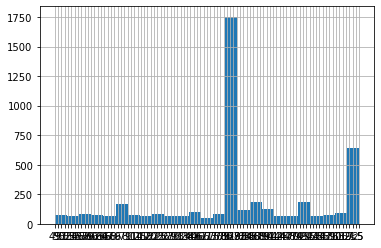

In [28]:
dff['Value'].hist(bins=25)

KeyError: "None of [Index(['Value'], dtype='object')] are in the [columns]"

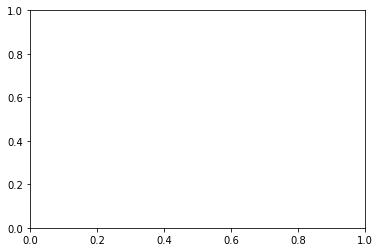

In [32]:
print(dff.boxplot(column='Value'))

In [31]:
sns.boxplot(x=dff['Value'])

TypeError: Horizontal orientation requires numeric `x` variable.

c:\Users\AliPC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value', ylabel='count'>

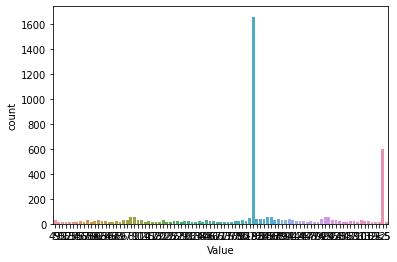

In [30]:
sns.countplot(dff.Value)